In [ ]:
# 1. Como voc√™ recupera dados do site
import numpy as np
import pandas as pd


In [ ]:
  trips_df = pd.read_csv('/content/project_sql_result_01.csv')
  neighborhoods_df = pd.read_csv('/content/moved_project_sql_result_04.csv')
  weather_trips_df = pd.read_csv('/content/moved_project_sql_result_07.csv')

In [ ]:
print("Dados de Corridas de T√°xi:")
print(trips_df.head())


Dados de Corridas de T√°xi:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [ ]:
print("\nDados de Bairros de Chicago:")
print(neighborhoods_df.head())


Dados de Bairros de Chicago:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


***Estudar os Dados que cada DataFrame Cont√™m***

In [ ]:
print("\nInforma√ß√µes sobre trips_df:")
print(trips_df.info())


Informa√ß√µes sobre trips_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [ ]:
print("\nInforma√ß√µes sobre neighborhoods_df:")
print(neighborhoods_df.info())


Informa√ß√µes sobre neighborhoods_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


*** Verificando os tipos de dados ***

In [ ]:
print("\nTipos de dados em trips_df:")
print(trips_df.dtypes)


Tipos de dados em trips_df:
company_name    object
trips_amount     int64
dtype: object


In [ ]:
print("\nTipos de dados em neighborhoods_df:")
print(neighborhoods_df.dtypes)


Tipos de dados em neighborhoods_df:
dropoff_location_name     object
average_trips            float64
dtype: object


*** Identifique os bairros com a maior m√©dia de corridas. ***

In [ ]:
top_neighborhoods = neighborhoods_df.nlargest(10, 'average_trips')
print("\nTop 10 Bairros por N√∫mero M√©dio de Corridas:")
print(top_neighborhoods)


Top 10 Bairros por N√∫mero M√©dio de Corridas:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


*** Fazer Gr√°ficos ***

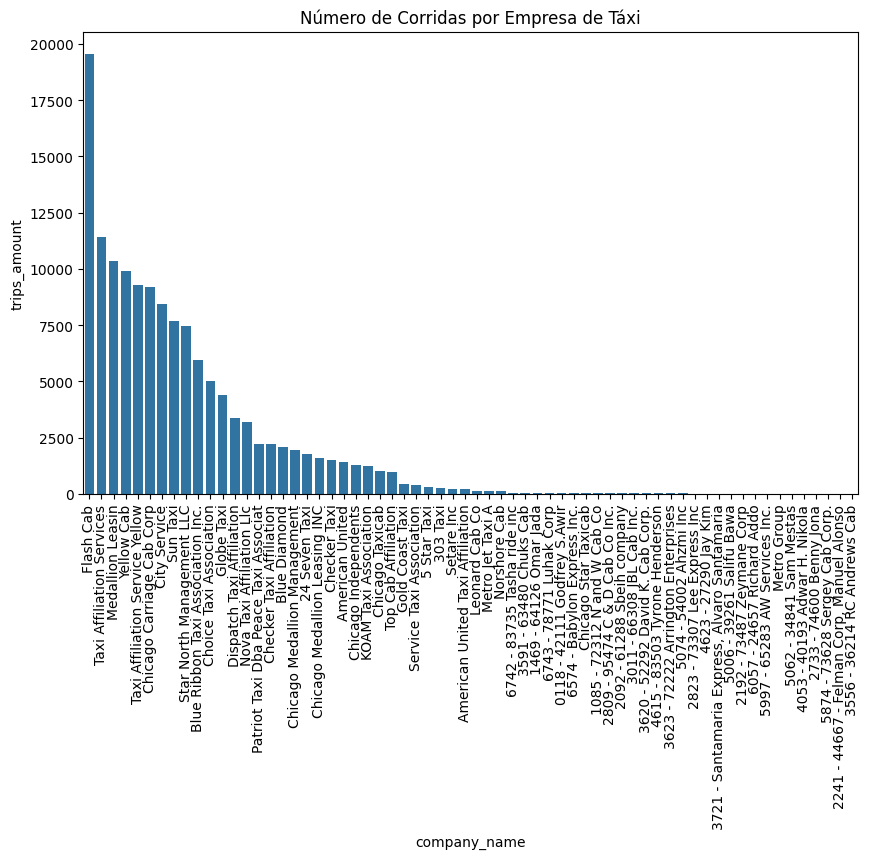

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 10 primeiras corridas
primeiras_corridas = trips_df.head(10)

# Gr√°fico de barras para o n√∫mero de corridas por empresa de t√°xi
plt.figure(figsize=(10, 6))
sns.barplot(x='company_name', y='trips_amount', data=trips_df)
plt.title('N√∫mero de Corridas por Empresa de T√°xi')
plt.xticks(rotation=90)
plt.show()


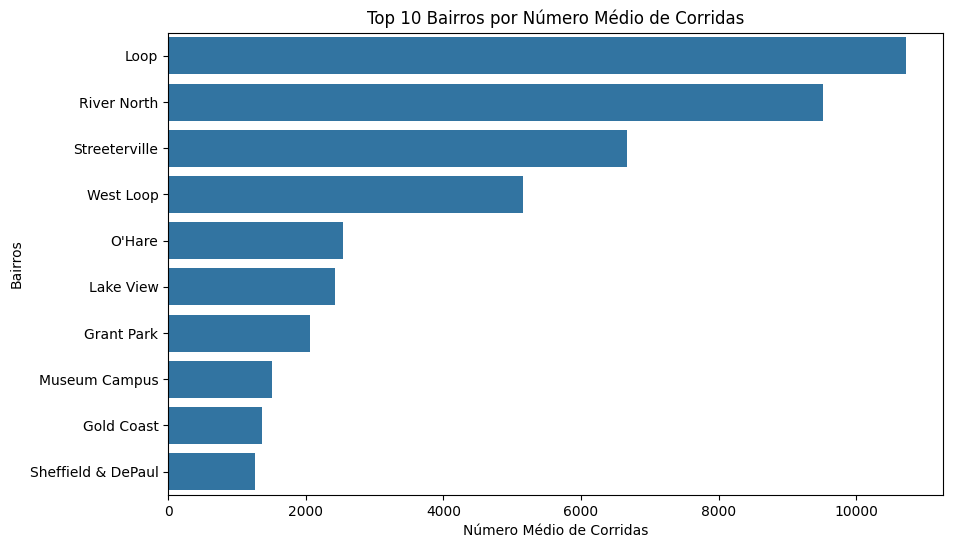

In [ ]:
# Gr√°fico de barras para os 10 principais bairros
plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_neighborhoods)
plt.title('Top 10 Bairros por N√∫mero M√©dio de Corridas')
plt.xlabel('N√∫mero M√©dio de Corridas')
plt.ylabel('Bairros')
plt.show()

*** Teste de Hip√≥teses ***

Formula√ß√£o das Hip√≥teses
Hip√≥tese Nula (H0): A dura√ß√£o m√©dia das corridas do Loop para o Aeroporto Internacional O'Hare em s√°bados chuvosos n√£o √© diferente da dura√ß√£o m√©dia em  boas condi√ß√µes clim√°ticas.

Hip√≥tese Alternativa (ùêª1): A dura√ß√£o m√©dia das corridas do Loop para o Aeroporto Internacional O'Hare em s√°bados chuvosos √© diferente da dura√ß√£o m√©dia em s√°bados com boas condi√ß√µes clim√°ticas.

In [ ]:
from scipy import stats
from datetime import datetime


In [ ]:
# Filtrar dados para condi√ß√µes meteorol√≥gicas
rainy_trips = weather_trips_df[weather_trips_df['weather_conditions'] == 'Bad']['duration_seconds']
good_trips = weather_trips_df[weather_trips_df['weather_conditions'] == 'Good']['duration_seconds']

# Realizar o teste t
t_statistic, p_value = stats.ttest_ind(rainy_trips, good_trips)

# Definir n√≠vel de signific√¢ncia
alpha = 0.05

# Interpretar resultados
if p_value < alpha:
    print("Rejeita-se a hip√≥tese nula.")
else:
    print("N√£o se rejeita a hip√≥tese nula.")

print(f"T-statistic: {t_statistic}, p-value: {p_value}")


Rejeita-se a hip√≥tese nula.
T-statistic: 6.946177714041499, p-value: 6.517970327099473e-12


 Isso sugere que a dura√ß√£o m√©dia das corridas em s√°bados chuvosos √© significativamente diferente da dura√ß√£o em s√°bados com boas

In [ ]:
weather_trips_df['start_ts'] = pd.to_datetime(weather_trips_df['start_ts'])

In [ ]:
#
weather_trips_df['day_of_week'] = weather_trips_df['start_ts'].dt.day_name()

In [ ]:
weather_trips_df

start_ts weather_conditions  duration_seconds day_of_week
0    2017-11-25 16:00:00               Good            2410.0    Saturday
1    2017-11-25 14:00:00               Good            1920.0    Saturday
2    2017-11-25 12:00:00               Good            1543.0    Saturday
3    2017-11-04 10:00:00               Good            2512.0    Saturday
4    2017-11-11 07:00:00               Good            1440.0    Saturday
...                  ...                ...               ...         ...
1063 2017-11-25 11:00:00               Good               0.0    Saturday
1064 2017-11-11 10:00:00               Good            1318.0    Saturday
1065 2017-11-11 13:00:00               Good            2100.0    Saturday
1066 2017-11-11 08:00:00               Good            1380.0    Saturday
1067 2017-11-04 16:00:00                Bad            2834.0    Saturday

[1068 rows x 4 columns]

*** Formulando as Hip√≥teses***

H0: A dura√ß√£o m√©dia das corridas do Loop para O'Hare n√£o muda em dias chuvosos.
H1: A dura√ß√£o m√©dia das corridas do Loop para O'Hare muda em dias chuvosos.


In [ ]:
if p_value < alpha:
    print("Conclus√£o: H√° uma diferen√ßa significativa na dura√ß√£o das corridas do Loop para O'Hare em dias chuvosos.")
else:
    print("Conclus√£o: N√£o h√° evid√™ncias suficientes para afirmar que a dura√ß√£o das corridas do Loop para O'Hare muda em dias chuvosos.")

Conclus√£o: H√° uma diferen√ßa significativa na dura√ß√£o das corridas do Loop para O'Hare em dias chuvosos.
